<a href="https://colab.research.google.com/github/sowmya-sree-b/Car-Sales-Analysis/blob/main/USA_Car_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv(r'/content/drive/MyDrive/Projects /datasets/US Car Sales/USA_cars_datasets.csv')
df = df.drop('Unnamed: 0', 1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


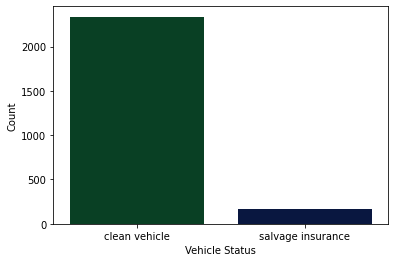

In [5]:
fig, ax = plt.subplots()
sns.set_palette("ocean")
sns.countplot(x = "title_status", data = df, ax = ax)
ax.set_xlabel("Vehicle Status")
ax.set_ylabel("Count")
plt.show()

### **Sale Price and Mileage Distributions**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Distance Travelled (Miles)')

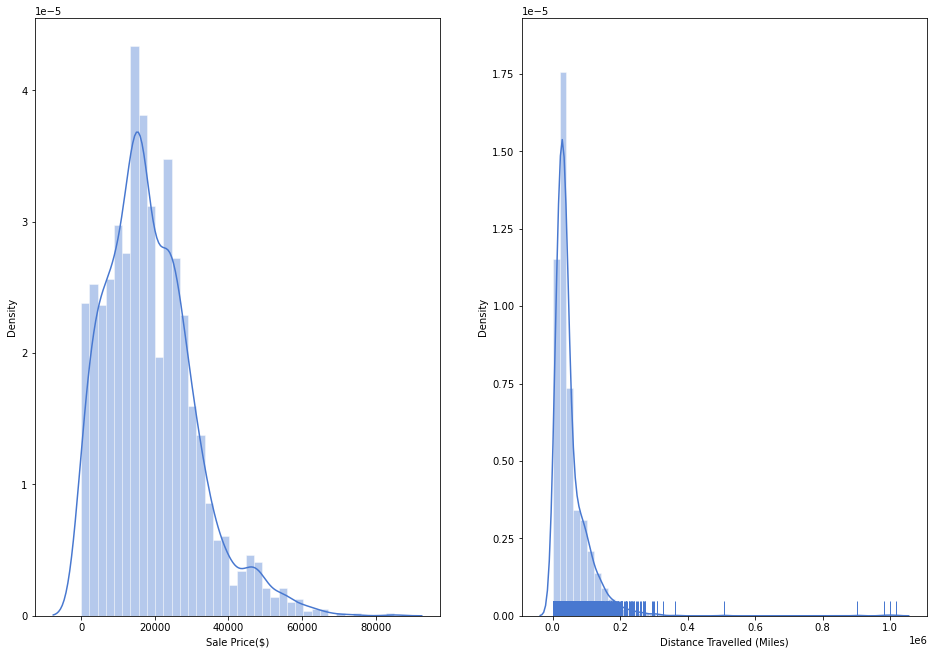

In [6]:
sns.set_palette("muted")
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize=(16,11))
sns.set_style("darkgrid")
sns.distplot(df['price'],ax = ax0)
sns.distplot(df["mileage"],hist = True, rug = True, ax= ax1)
ax0.set_xlabel("Sale Price($)")
ax1.set_xlabel("Distance Travelled (Miles)")

### **Sale Price Distribution Based on Vehicle**

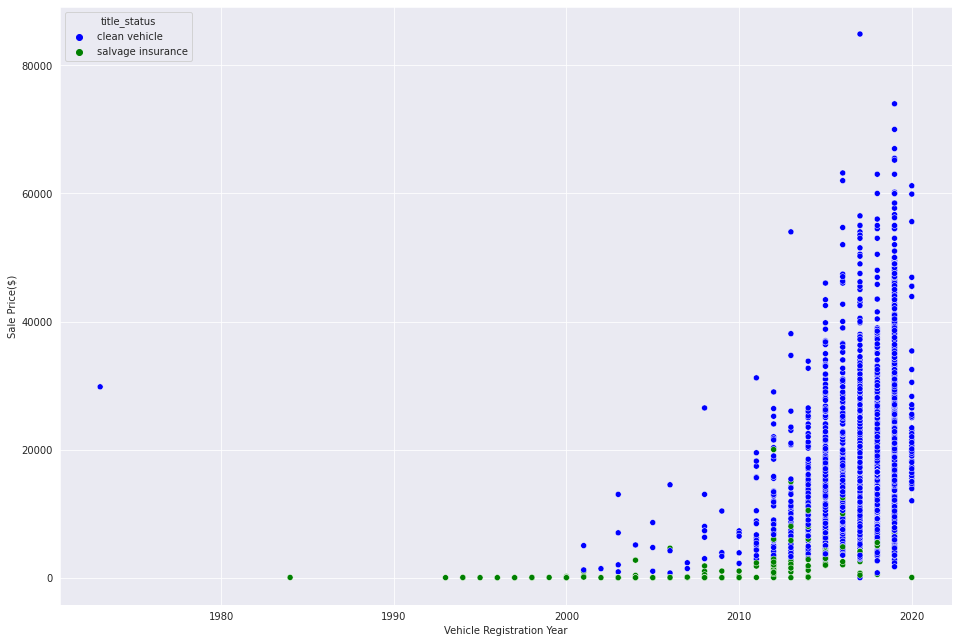

In [7]:
custom_palette = ["blue", "green", "orange","red","yellow", "purple"]
sns.set_palette(custom_palette)
fig, ax = plt.subplots(figsize = (16,11))
sns.scatterplot(x = "year", y = "price", hue = "title_status", data = df, ax = ax)
ax.set_xlabel("Vehicle Registration Year")
ax.set_ylabel("Sale Price($)")
plt.show()

### **Mileage Distribution Based on Sale Price and Registration Year**

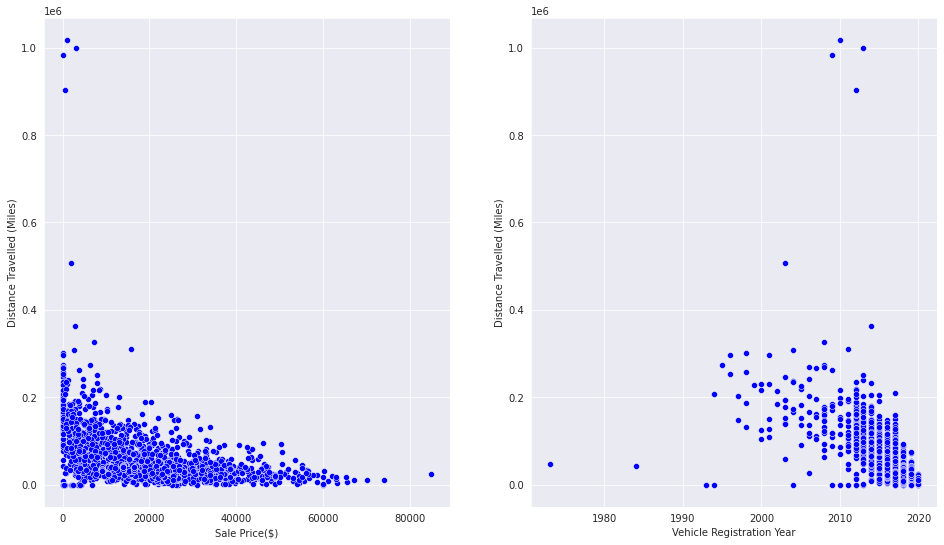

In [8]:
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize=(16,9))
sns.set_style("darkgrid")
sns.scatterplot(x = "price", y = "mileage", data = df, ax =ax0)
sns.scatterplot(x = "year", y = "mileage", data = df, ax= ax1)
ax0.set_xlabel("Sale Price($)")
ax1.set_xlabel("Vehicle Registration Year")
ax0.set_ylabel("Distance Travelled (Miles)")
ax1.set_ylabel("Distance Travelled (Miles)")
plt.show()

### **Price Distribution of Top Five Colors**

In [9]:
top5_colors = list(df.color.value_counts()[0:5].index)
top5_colors

['white', 'black', 'gray', 'silver', 'red']

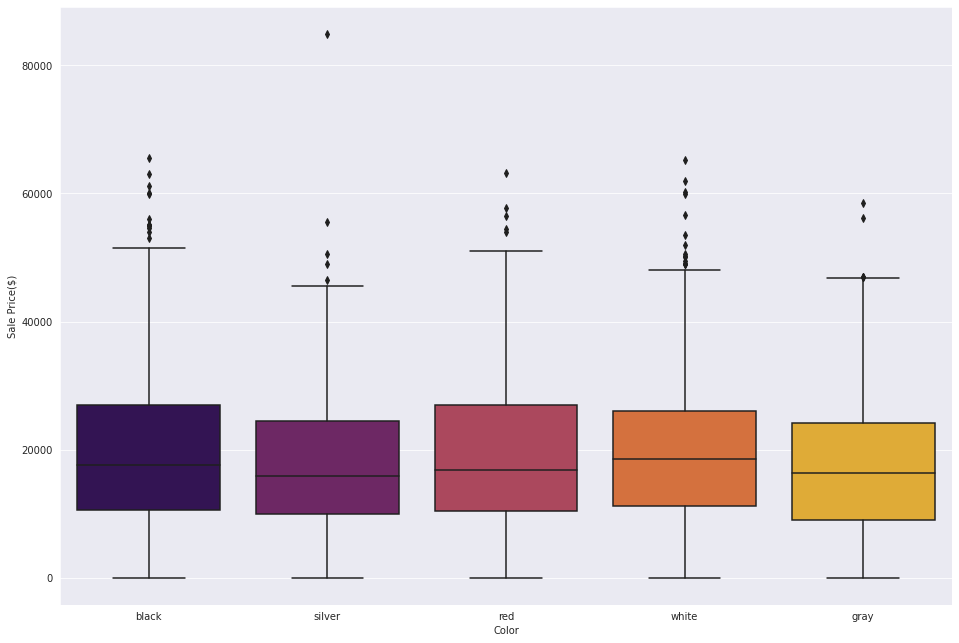

In [10]:
df_top5_color = df[df["color"].isin(top5_colors)]
fig, ax = plt.subplots(figsize = (16,11))
sns.boxplot(x = "color", y = "price",data = df_top5_color,palette = "inferno", ax = ax)
ax.set_xlabel("Color")
ax.set_ylabel("Sale Price($)")
plt.show()

### **Price Distribution of Brands with more than Ten Cars for Sale**

In [11]:
df["brand"].value_counts()[df["brand"].value_counts() >= 10].index

Index(['ford', 'dodge', 'nissan', 'chevrolet', 'gmc', 'jeep', 'chrysler',
       'bmw', 'hyundai', 'kia', 'buick', 'infiniti', 'honda', 'cadillac',
       'mercedes-benz'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 42.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.1% of the points cannot be placed; you

Text(0, 0.5, 'Brand')

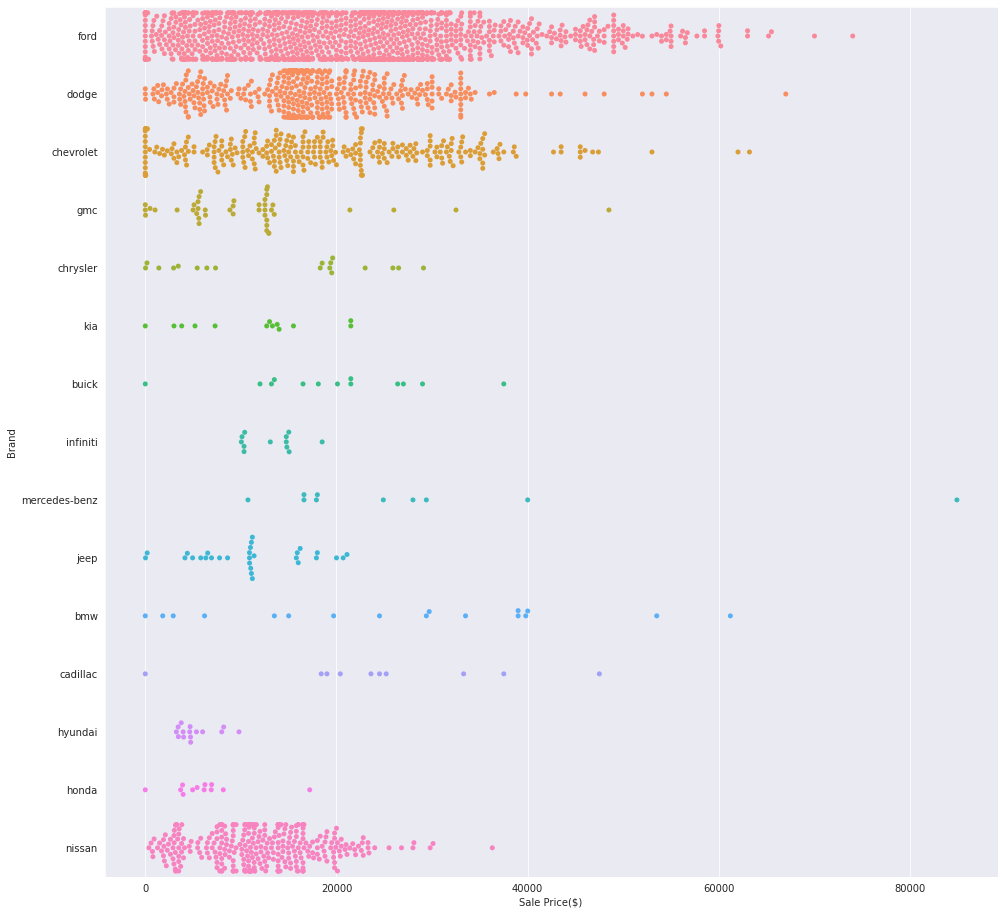

In [12]:
over10_brands = df["brand"].value_counts()[df["brand"].value_counts() >= 10].index
df_over10_cars_per_brand = df[df["brand"].isin(over10_brands)]
fig, ax = plt.subplots(figsize = (16,16))
sns.swarmplot(data = df_over10_cars_per_brand, x = "price", y = "brand", ax = ax)
ax.set_xlabel("Sale Price($)")
ax.set_ylabel("Brand")

### **Price Distribution of States with more than 100 Cars for Sale**

Text(0, 0.5, 'State')

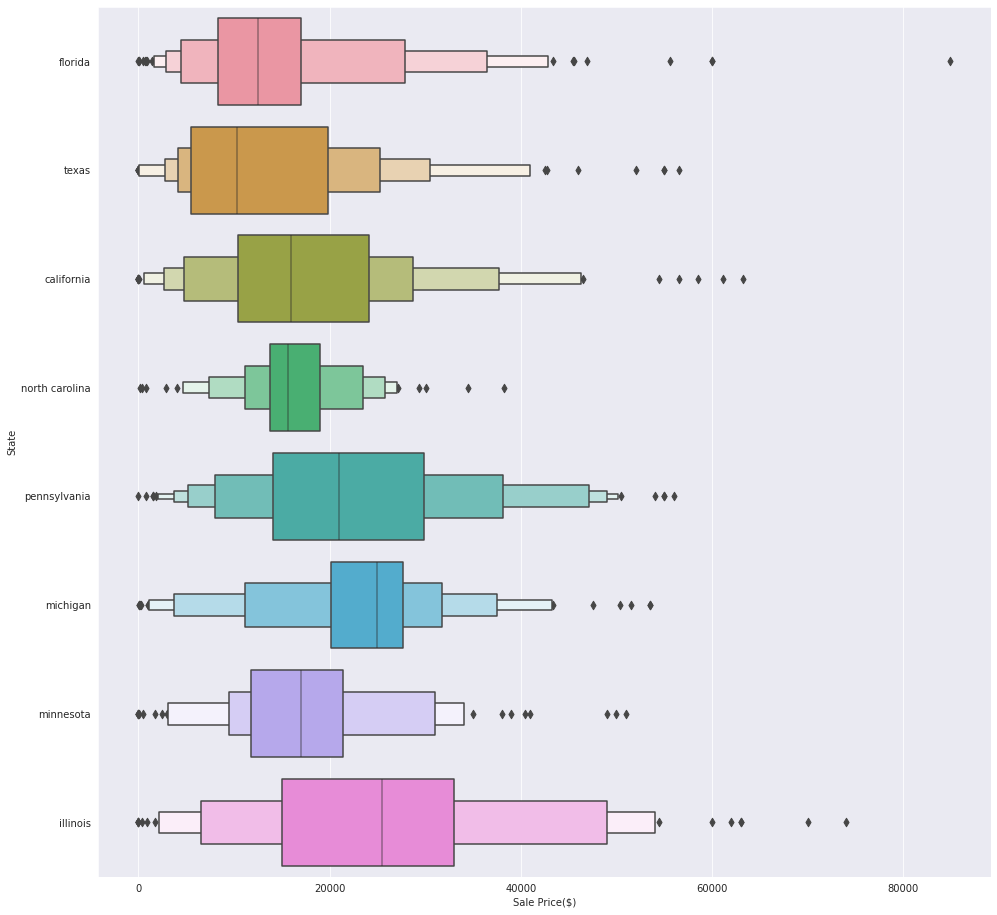

In [16]:
over100_states = df["state"].value_counts()[df["state"].value_counts() >= 100].index
df_over100_cars_per_state = df[df["state"].isin(over100_states)]
fig, ax = plt.subplots(figsize = (16,16))
sns.boxenplot(data=df_over100_cars_per_state, y="state", x="price", ax=ax)
ax.set_xlabel("Sale Price($)")
ax.set_ylabel("State")